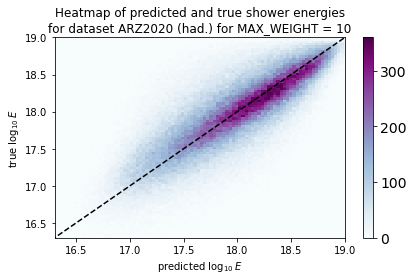

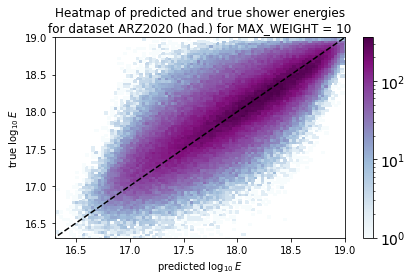

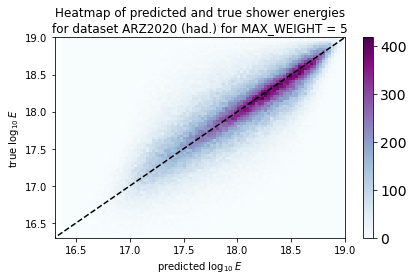

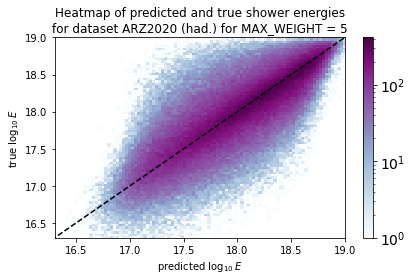

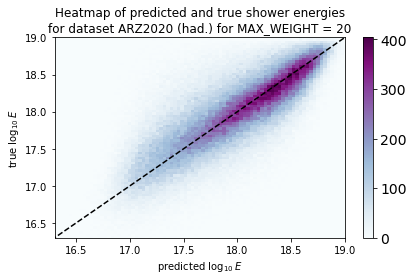

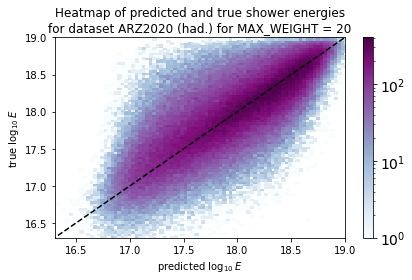

In [1]:
from matplotlib import pyplot as plt
from toolbox import get_histogram2d, get_pred_energy_diff_data


for run_id in ["E17.1", "E18.1", "E19.1"]:

    # Save the run name
    run_name = f"run{run_id}"

    # Constants
    cmap = "BuPu"
    log_E_string = r"$\log_{10}\:E$"
    xlabel = f"predicted {log_E_string}"
    ylabel = f"true {log_E_string}"
    bins = 100
    plot_title = f"Heatmap of predicted and true shower energies for {run_name}"

    if run_id == "E17.1": # Alvarez2009 (had.)
        plot_title = "Heatmap of predicted and true shower energies\nfor dataset ARZ2020 (had.) for MAX_WEIGHT = 10"
    elif run_id == "E18.1": # ARZ2020 (had.)
        plot_title = "Heatmap of predicted and true shower energies\nfor dataset ARZ2020 (had.) for MAX_WEIGHT = 5"
    elif run_id == "E19.1": # ARZ2020 (had. + EM)
        plot_title = "Heatmap of predicted and true shower energies\nfor dataset ARZ2020 (had.) for MAX_WEIGHT = 20"

    # %%
    energy_difference_data, shower_energy_log10_predict, shower_energy_log10 = get_pred_energy_diff_data(run_name, True)


    for cscale in ["linear", "log"]:
        file_name = f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}.png"

        # Also plot a heatmap of the scatter plot instead of just dots
        fig, ax, im = get_histogram2d(shower_energy_log10_predict, shower_energy_log10, fname=file_name, title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, cmap=cmap, cscale=cscale)

        # Plot a black line through the middle
        xmin = min(shower_energy_log10_predict)
        xmax = max(shower_energy_log10_predict)
        ymin = min(shower_energy_log10)
        ymax = max(shower_energy_log10)

        ax.plot([min(xmin, ymin), max(xmax, ymax)], [min(xmin, ymin), max(xmax, ymax)], 'k--')

        ax.set_xlim(16.3, 19)
        ax.set_ylim(16.3, 19)

        # if run_id == "E13.1":
        #     ax.set_xlim(17, 19)
        #     ax.set_ylim(17, 19)

        plt.tight_layout()
        plt.savefig(file_name, dpi=300)